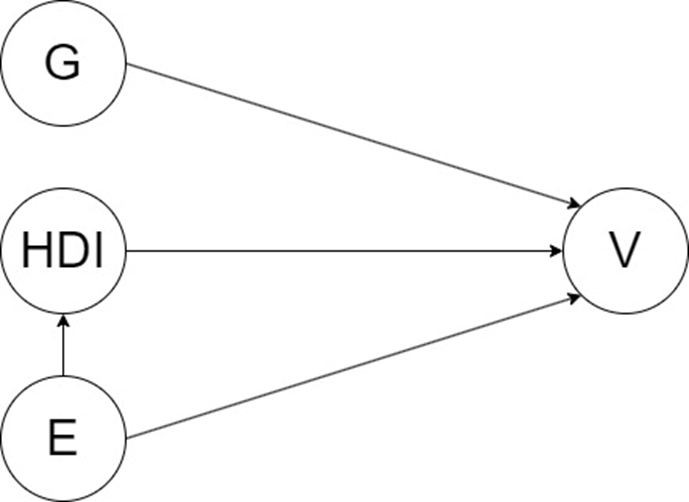

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from cmdstanpy import CmdStanModel


file_path = 'data/main_data.xlsx'
data = pd.read_excel(file_path)

data.head()


C:\Users\szczy\AppData\Roaming\Python\Python312\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


,Year,State,Democratic %,Gun ownership %,HDI,Unemployment %
0,1992,Alabama,0.409,0.552,0.839,0.07525
1,1992,Alaska,0.303,0.685,0.915,0.08858
2,1992,Arizona,0.365,0.547,0.876,0.07567
3,1992,Arkansas,0.532,0.533,0.839,0.07000
4,1992,California,0.460,0.402,0.883,0.09350


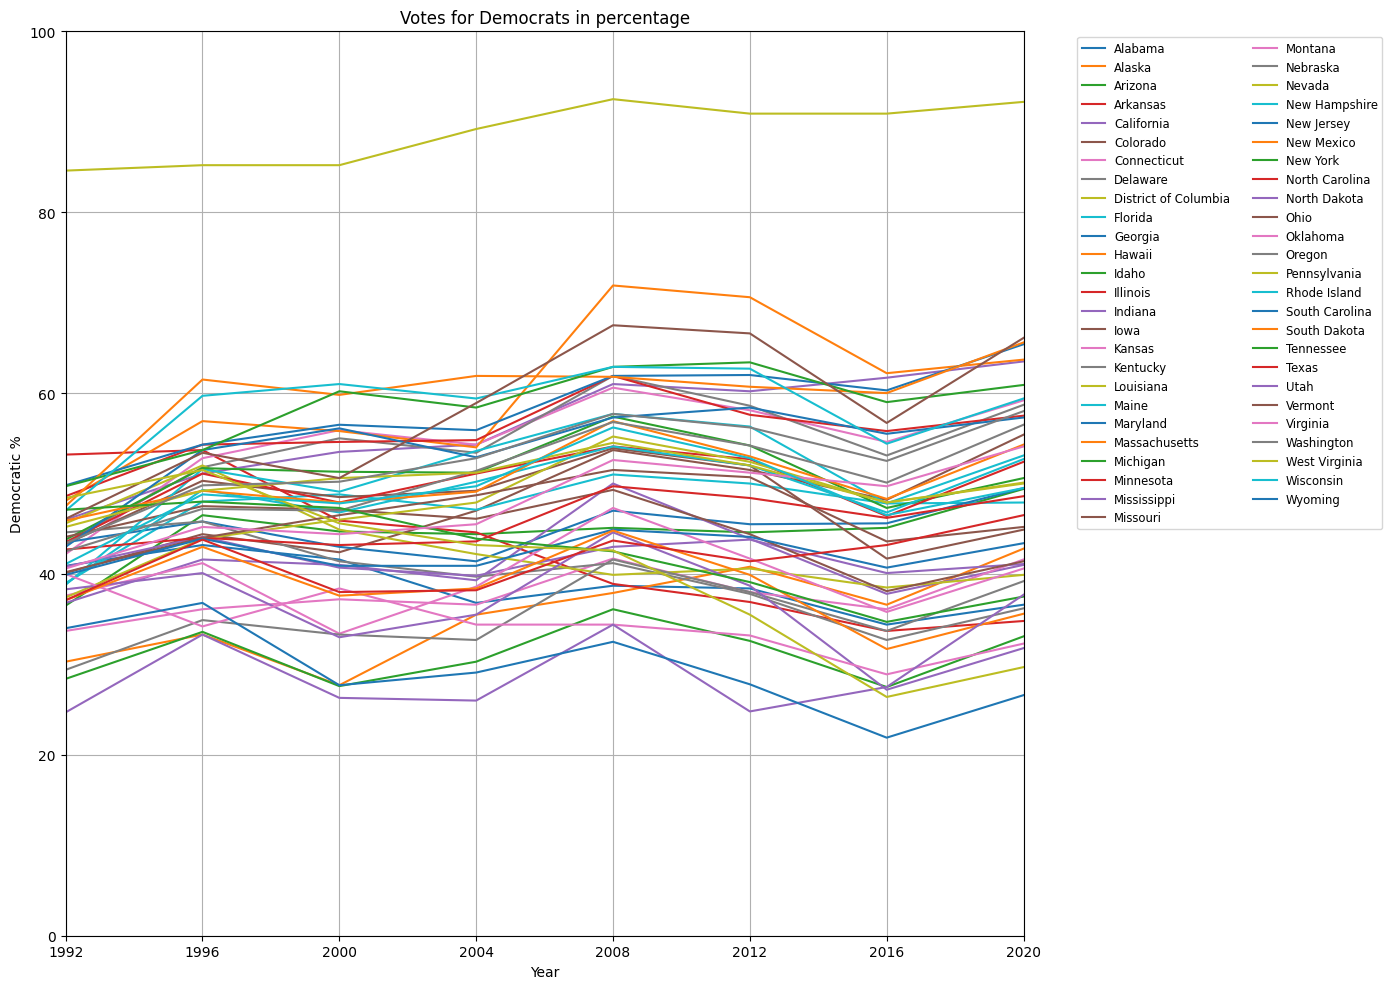

In [2]:
plt.figure(figsize=(14, 10))

for state in data["State"].unique():
    state_data = data[data["State"] == state]
    plt.plot(state_data["Year"], state_data["Democratic %"] * 100, label=state)

plt.xlabel('Year')
plt.ylabel('Democratic %')
plt.title('Votes for Democrats in percentage')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small', ncol=2)
plt.grid(True)
plt.tight_layout()
plt.xticks(np.linspace(1992, 2020, 8))
plt.xlim([1992, 2020])
plt.ylim([0, 100])
plt.show()


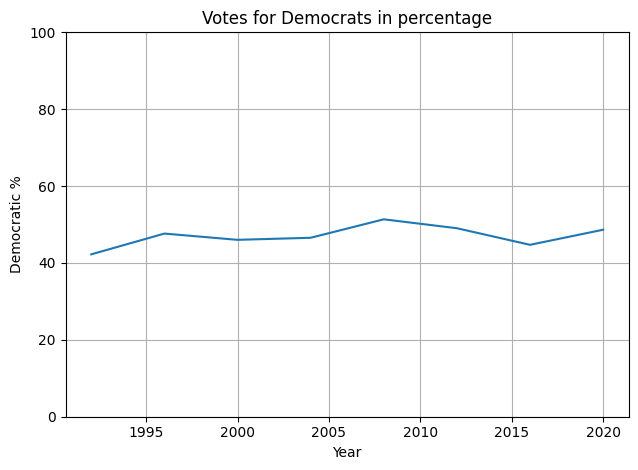

In [3]:
mean_democratic_votes = [data[data['Year'] == year]['Democratic %'].mean()*100 for year in data["Year"].unique()]

plt.plot(data["Year"].unique(), mean_democratic_votes)

plt.xlabel('Year')
plt.ylabel('Democratic %')
plt.title('Votes for Democrats in percentage')
plt.grid(True)
plt.tight_layout()
# plt.xticks(np.linspace(1992, 2020, 8))
# plt.xlim([1992, 2020])
plt.ylim([0, 100])
plt.show()


In [4]:
file_path = 'data/main_data.xlsx'
data = pd.read_excel(file_path, engine='openpyxl')

print(data.isna().sum())

data = data.dropna()

print("Columns in the dataframe:", data.columns)

data['Year'] = data['Year'].astype(str).str.strip()

stan_file_path = 'model_1.stan'  
model_1 = CmdStanModel(stan_file=stan_file_path)

input_model_1 = {
    'N': len(data), 
    'V': data['Democratic %'].values, 
    'G': data['Gun ownership %'].values, 
    'HDI': data['HDI'].values
}

fit = model_1.sample(data=input_model_1, chains=1, seed=28052020, show_console=True)

df_fit = fit.draws_pd()


Year               0
State              0
Democratic %       0
Gun ownership %    0
HDI                0
Unemployment %     0
dtype: int64
Columns in the dataframe: Index(['Year', 'State', 'Democratic %', 'Gun ownership %', 'HDI',
       'Unemployment %'],
      dtype='object')


13:23:47 - cmdstanpy - INFO - compiling stan file C:\Users\szczy\Desktop\STUDIA\MAGIST~1\DATA_A~1\Project\PREDIC~1\model_1.stan to exe file C:\Users\szczy\Desktop\STUDIA\Magisterka sem1\Data_Analytics\Project\Predicting-USA-presidential-elections\model_1.exe
13:25:15 - cmdstanpy - INFO - compiled model executable: C:\Users\szczy\Desktop\STUDIA\Magisterka sem1\Data_Analytics\Project\Predicting-USA-presidential-elections\model_1.exe
13:25:16 - cmdstanpy - INFO - Chain [1] start processing


Chain [1] method = sample (Default)
Chain [1] sample
Chain [1] num_samples = 1000 (Default)
Chain [1] num_warmup = 1000 (Default)
Chain [1] save_warmup = 0 (Default)
Chain [1] thin = 1 (Default)
Chain [1] adapt
Chain [1] engaged = 1 (Default)
Chain [1] gamma = 0.05 (Default)
Chain [1] delta = 0.8 (Default)
Chain [1] kappa = 0.75 (Default)
Chain [1] t0 = 10 (Default)
Chain [1] init_buffer = 75 (Default)
Chain [1] term_buffer = 50 (Default)
Chain [1] window = 25 (Default)
Chain [1] save_metric = 0 (Default)
Chain [1] algorithm = hmc (Default)
Chain [1] hmc
Chain [1] engine = nuts (Default)
Chain [1] nuts
Chain [1] max_depth = 10 (Default)
Chain [1] metric = diag_e (Default)
Chain [1] metric_file =  (Default)
Chain [1] stepsize = 1 (Default)
Chain [1] stepsize_jitter = 0 (Default)
Chain [1] num_chains = 1 (Default)
Chain [1] id = 1 (Default)
Chain [1] data
Chain [1] file = C:\Users\szczy\AppData\Local\Temp\tmptvih_dy6\uek_471a.json
Chain [1] init = 2 (Default)
Chain [1] random
Chain [1] s

13:25:18 - cmdstanpy - INFO - Chain [1] done processing


Chain [1] Iteration: 1800 / 2000 [ 90%]  (Sampling)
Chain [1] Iteration: 1900 / 2000 [ 95%]  (Sampling)
Chain [1] Iteration: 2000 / 2000 [100%]  (Sampling)
Chain [1] 
Chain [1] Elapsed Time: 0.797 seconds (Warm-up)
Chain [1] 0.866 seconds (Sampling)
Chain [1] 1.663 seconds (Total)
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 


13:25:18 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'model_1.stan', line 16, column 4 to column 53)
13:25:18 - cmdstanpy - WARNING - Some chains may have failed to converge.
	Chain 1 had 36 divergent transitions (3.6%)
	Use the "diagnose()" method on the CmdStanMCMC object to see further information.


In [5]:
df_fit.head()


,chain__,iter__,draw__,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,...,V_pred[399],V_pred[400],V_pred[401],V_pred[402],V_pred[403],V_pred[404],V_pred[405],V_pred[406],V_pred[407],V_pred[408]
0,1.0,1.0,1.0,698.387,0.244818,0.180826,4.0,15.0,0.0,-696.173,...,0.431536,0.432632,0.608280,0.504532,0.457208,0.308942,0.406968,0.555750,0.457423,0.511083
1,1.0,2.0,2.0,696.390,0.794505,0.180826,4.0,15.0,0.0,-693.559,...,0.362538,0.553197,0.341298,0.366799,0.479709,0.564435,0.457636,0.372224,0.556118,0.533249
2,1.0,3.0,3.0,699.782,0.593249,0.180826,4.0,15.0,0.0,-696.012,...,0.420726,0.276638,0.434564,0.522359,0.603901,0.488332,0.489362,0.640290,0.514185,0.460936
3,1.0,4.0,4.0,699.695,0.709128,0.180826,3.0,11.0,0.0,-698.007,...,0.650836,0.518999,0.541045,0.473157,0.403391,0.658430,0.385460,0.507531,0.427848,0.491193
4,1.0,5.0,5.0,699.219,0.748583,0.180826,3.0,15.0,0.0,-698.115,...,0.432228,0.344534,0.416518,0.468747,0.518412,0.603152,0.469325,0.388451,0.535733,0.449805


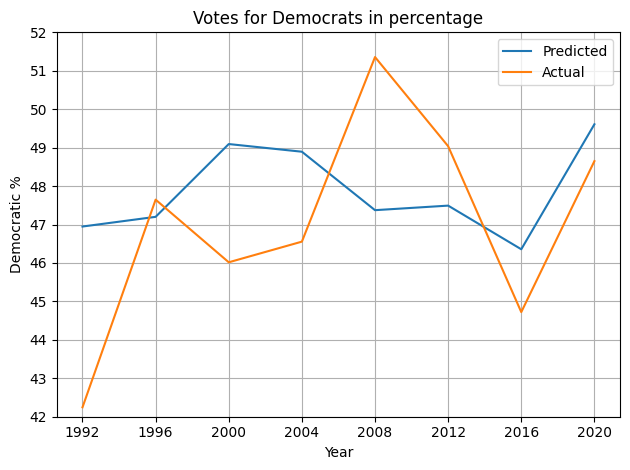

In [6]:
predicted_democratic_votes = []
mean_predicted_democratic_votes = []

for i in range(408):
    predicted_democratic_votes.append(df_fit[f'V_pred[{i+1}]'].sample())


for i in range(8):
    mean_predicted_democratic_votes.append(np.mean(predicted_democratic_votes[i*51:i*51+51])*100)

plt.plot(data["Year"].unique(), mean_predicted_democratic_votes, label="Predicted")
plt.plot(data["Year"].unique(), mean_democratic_votes, label = "Actual")

plt.xlabel('Year')
plt.ylabel('Democratic %')
plt.title('Votes for Democrats in percentage')
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.yticks(np.linspace(42, 52, 11))
# plt.xlim([1992, 2020])
plt.ylim([42, 52])
plt.show()

In [9]:
stan_file_path = 'model1_with_priors.stan'

# Compile the Stan model
model_1 = CmdStanModel(stan_file=stan_file_path)

# Sample from the model
fit = model_1.sample(data=input_model_1, chains=1, seed=28052020, show_console=True)

# Extract the draws
df_fit = fit.draws_pd()
print(df_fit.head())

15:38:35 - cmdstanpy - INFO - compiling stan file C:\Users\szczy\Desktop\STUDIA\MAGIST~1\DATA_A~1\Project\PREDIC~1\model1_with_priors.stan to exe file C:\Users\szczy\Desktop\STUDIA\Magisterka sem1\Data_Analytics\Project\Predicting-USA-presidential-elections\model1_with_priors.exe
15:39:14 - cmdstanpy - INFO - compiled model executable: C:\Users\szczy\Desktop\STUDIA\Magisterka sem1\Data_Analytics\Project\Predicting-USA-presidential-elections\model1_with_priors.exe
15:39:15 - cmdstanpy - INFO - Chain [1] start processing


Chain [1] method = sample (Default)
Chain [1] sample
Chain [1] num_samples = 1000 (Default)
Chain [1] num_warmup = 1000 (Default)
Chain [1] save_warmup = 0 (Default)
Chain [1] thin = 1 (Default)
Chain [1] adapt
Chain [1] engaged = 1 (Default)
Chain [1] gamma = 0.05 (Default)
Chain [1] delta = 0.8 (Default)
Chain [1] kappa = 0.75 (Default)
Chain [1] t0 = 10 (Default)
Chain [1] init_buffer = 75 (Default)
Chain [1] term_buffer = 50 (Default)
Chain [1] window = 25 (Default)
Chain [1] save_metric = 0 (Default)
Chain [1] algorithm = hmc (Default)
Chain [1] hmc
Chain [1] engine = nuts (Default)
Chain [1] nuts
Chain [1] max_depth = 10 (Default)
Chain [1] metric = diag_e (Default)
Chain [1] metric_file =  (Default)
Chain [1] stepsize = 1 (Default)
Chain [1] stepsize_jitter = 0 (Default)
Chain [1] num_chains = 1 (Default)
Chain [1] id = 1 (Default)
Chain [1] data
Chain [1] file = C:\Users\szczy\AppData\Local\Temp\tmptvih_dy6\3wrwevvn.json
Chain [1] init = 2 (Default)
Chain [1] random
Chain [1] s

15:39:21 - cmdstanpy - INFO - Chain [1] done processing
15:39:21 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'model1_with_priors.stan', line 23, column 4 to column 57)


Chain [1] Iteration: 2000 / 2000 [100%]  (Sampling)
Chain [1] 
Chain [1] Elapsed Time: 2.478 seconds (Warm-up)
Chain [1] 3.996 seconds (Sampling)
Chain [1] 6.474 seconds (Total)
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
   chain__  iter__  draw__     lp__  accept_stat__  stepsize__  treedepth__  \
0      1.0     1.0     1.0  888.962       0.997149    0.019493          6.0   
1      1.0     2.0     2.0  889.488       0.952860    0.019493          8.0   
2      1.0     3.0     3.0  889.904       0.938893    0.019493          8.0   
3      1.0     4.0     4.0  891.470       0.998331    0.019493          7.0   
4      1.0     5.0     5.0  890.496       

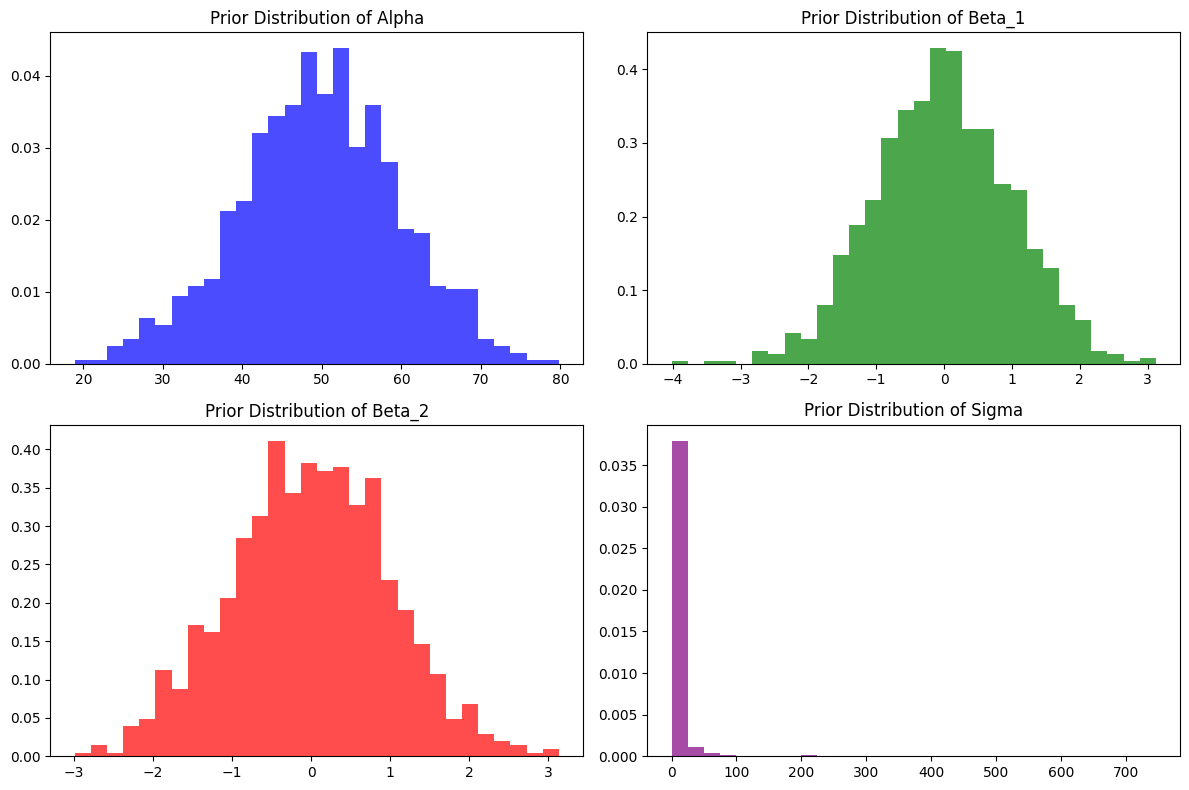

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Simulate parameter values from the priors
n_samples = 1000
alpha_prior = np.random.normal(50, 10, n_samples)
beta_1_prior = np.random.normal(0, 1, n_samples)
beta_2_prior = np.random.normal(0, 1, n_samples)
sigma_prior = np.random.standard_cauchy(n_samples) * 2
sigma_prior = sigma_prior[sigma_prior > 0]  # Keep only positive values

# Plot the distributions of the simulated prior values
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.hist(alpha_prior, bins=30, density=True, alpha=0.7, color='blue')
plt.title('Prior Distribution of Alpha')

plt.subplot(2, 2, 2)
plt.hist(beta_1_prior, bins=30, density=True, alpha=0.7, color='green')
plt.title('Prior Distribution of Beta_1')

plt.subplot(2, 2, 3)
plt.hist(beta_2_prior, bins=30, density=True, alpha=0.7, color='red')
plt.title('Prior Distribution of Beta_2')

plt.subplot(2, 2, 4)
plt.hist(sigma_prior, bins=30, density=True, alpha=0.7, color='purple')
plt.title('Prior Distribution of Sigma')

plt.tight_layout()
plt.show()

Range of Democratic %: 21.9 92.5


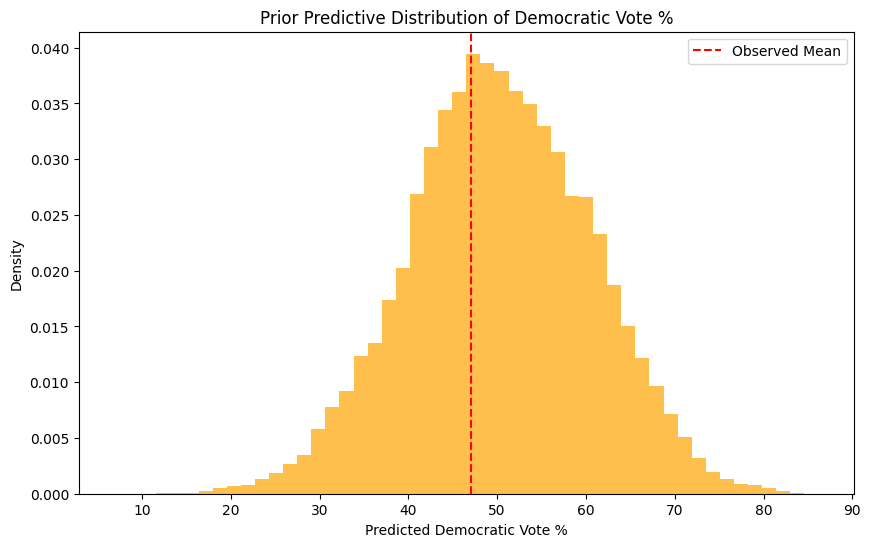

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Simulate parameter values from the priors
n_samples = 1000
alpha_prior = np.random.normal(50, 10, n_samples)
beta_1_prior = np.random.normal(0, 1, n_samples)
beta_2_prior = np.random.normal(0, 1, n_samples)
sigma_prior = np.random.normal(2, 1, n_samples)
sigma_prior = sigma_prior[sigma_prior > 0]  # Keep only positive values

# Trim other priors to match the length of sigma_prior
n_samples = len(sigma_prior)
alpha_prior = alpha_prior[:n_samples]
beta_1_prior = beta_1_prior[:n_samples]
beta_2_prior = beta_2_prior[:n_samples]

# Clean Gun ownership % data to ensure values are between 0 and 1
data['Gun ownership %'] = np.clip(data['Gun ownership %'], 0, 1)

# Rescale Democratic % to be between 0 and 100
data['Democratic %'] = data['Democratic %'] * 100

# Check the observed Democratic % values
print("Range of Democratic %:", np.min(data['Democratic %']), np.max(data['Democratic %']))

# Prepare for prior predictive checks
N = len(data)
V_prior_pred = np.zeros((n_samples, N))

for i in range(n_samples):
    V_prior_pred[i, :] = (alpha_prior[i] + 
                          beta_1_prior[i] * data['Gun ownership %'].values + 
                          beta_2_prior[i] * data['HDI'].values + 
                          sigma_prior[i] * np.random.randn(N))

# Flatten the array to plot all predictions
V_prior_pred_flat = V_prior_pred.flatten()

# Compute the observed mean
observed_mean = data['Democratic %'].mean()

# Plot the prior predictive distributions
plt.figure(figsize=(10, 6))
plt.hist(V_prior_pred_flat, bins=50, density=True, alpha=0.7, color='orange')
plt.axvline(observed_mean, color='r', linestyle='--', label='Observed Mean')
plt.xlabel('Predicted Democratic Vote %')
plt.ylabel('Density')
plt.title('Prior Predictive Distribution of Democratic Vote %')
plt.legend()
plt.show()

16:11:13 - cmdstanpy - INFO - Chain [1] start processing
16:11:13 - cmdstanpy - INFO - Chain [2] start processing
16:11:13 - cmdstanpy - INFO - Chain [3] start processing
16:11:13 - cmdstanpy - INFO - Chain [4] start processing


Chain [1] method = sample (Default)
Chain [1] sample
Chain [1] num_samples = 1000 (Default)
Chain [1] num_warmup = 1000 (Default)
Chain [1] save_warmup = 0 (Default)
Chain [1] thin = 1 (Default)
Chain [1] adapt
Chain [1] engaged = 1 (Default)
Chain [1] gamma = 0.05 (Default)
Chain [1] delta = 0.8 (Default)
Chain [1] kappa = 0.75 (Default)
Chain [1] t0 = 10 (Default)
Chain [1] init_buffer = 75 (Default)
Chain [1] term_buffer = 50 (Default)
Chain [1] window = 25 (Default)
Chain [1] save_metric = 0 (Default)
Chain [1] algorithm = hmc (Default)
Chain [1] hmc
Chain [1] engine = nuts (Default)
Chain [1] nuts
Chain [1] max_depth = 10 (Default)
Chain [1] metric = diag_e (Default)
Chain [1] metric_file =  (Default)
Chain [1] stepsize = 1 (Default)
Chain [1] stepsize_jitter = 0 (Default)
Chain [1] num_chains = 1 (Default)
Chain [1] id = 1 (Default)
Chain [1] data
Chain [1] file = C:\Users\szczy\AppData\Local\Temp\tmptvih_dy6\ehiq08gl.json
Chain [1] init = 2 (Default)
Chain [1] random
Chain [1] s

16:11:24 - cmdstanpy - INFO - Chain [2] done processing


Chain [2] Iteration: 2000 / 2000 [100%]  (Sampling)
Chain [2] 
Chain [2] Elapsed Time: 4.503 seconds (Warm-up)
Chain [2] 6.409 seconds (Sampling)
Chain [2] 10.912 seconds (Total)
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 


16:11:24 - cmdstanpy - INFO - Chain [3] done processing
16:11:24 - cmdstanpy - INFO - Chain [4] done processing
16:11:24 - cmdstanpy - INFO - Chain [1] done processing


Chain [3] Iteration: 2000 / 2000 [100%]  (Sampling)
Chain [3] 
Chain [3] Elapsed Time: 4.194 seconds (Warm-up)
Chain [3] 7.019 seconds (Sampling)
Chain [3] 11.213 seconds (Total)
Chain [3] 
Chain [4] Iteration: 2000 / 2000 [100%]  (Sampling)
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [4] 
Chain [4] Elapsed Time: 4.479 seconds (Warm-up)
Chain [4] 6.743 s

16:11:24 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'model1_with_priors.stan', line 23, column 4 to column 57)
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'model1_with_priors.stan', line 23, column 4 to column 57)
	Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'model1_with_priors.stan', line 23, column 4 to column 57)
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'model1_with_priors.stan', line 23, column 4 to column 57)


Processing csv files: C:\Users\szczy\AppData\Local\Temp\tmptvih_dy6\model1_with_priorsoozwdw6l\model1_with_priors-20240612161113_1.csv, C:\Users\szczy\AppData\Local\Temp\tmptvih_dy6\model1_with_priorsoozwdw6l\model1_with_priors-20240612161113_2.csv, C:\Users\szczy\AppData\Local\Temp\tmptvih_dy6\model1_with_priorsoozwdw6l\model1_with_priors-20240612161113_3.csv, C:\Users\szczy\AppData\Local\Temp\tmptvih_dy6\model1_with_priorsoozwdw6l\model1_with_priors-20240612161113_4.csv

Checking sampler transitions treedepth.
Treedepth satisfactory for all transitions.

Checking sampler transitions for divergences.
No divergent transitions found.

Checking E-BFMI - sampler transitions HMC potential energy.
E-BFMI satisfactory.

Effective sample size satisfactory.

Split R-hat values satisfactory all parameters.

Processing complete, no problems detected.



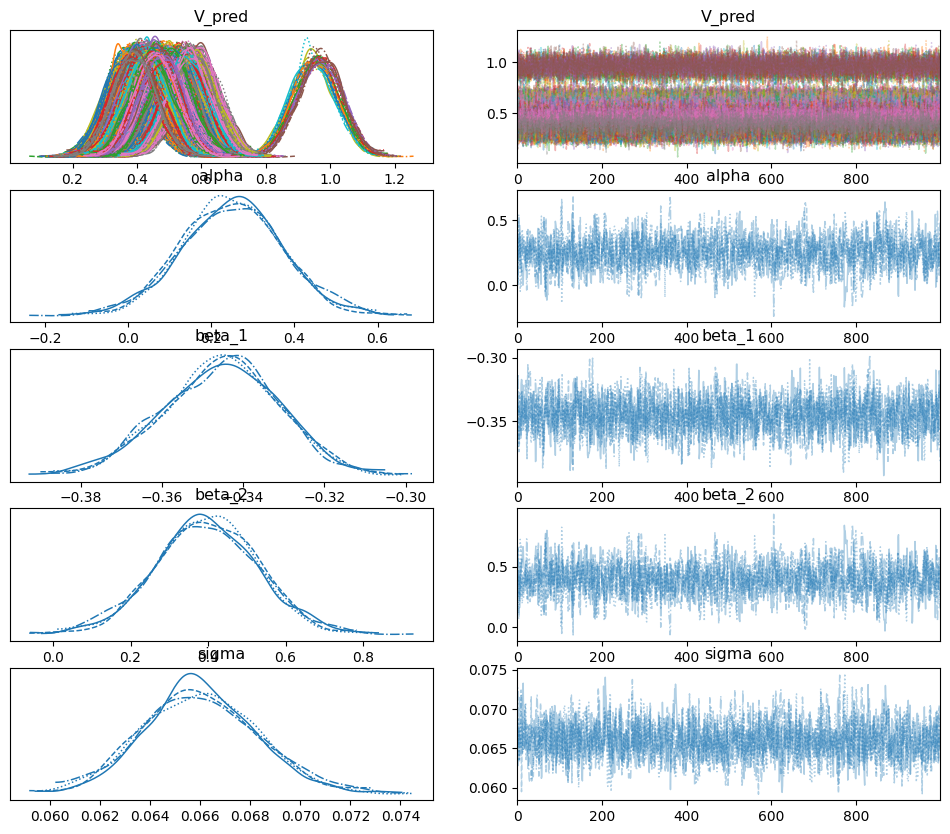

              mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
V_pred[0]    0.393  0.067   0.264    0.512      0.001    0.001    4065.0   
V_pred[1]    0.376  0.066   0.256    0.505      0.001    0.001    4026.0   
V_pred[2]    0.408  0.066   0.289    0.534      0.001    0.001    3899.0   
V_pred[3]    0.399  0.066   0.275    0.523      0.001    0.001    4113.0   
V_pred[4]    0.461  0.065   0.341    0.584      0.001    0.001    4121.0   
...            ...    ...     ...      ...        ...      ...       ...   
V_pred[407]  0.391  0.066   0.268    0.517      0.001    0.001    3797.0   
alpha        0.250  0.122   0.031    0.493      0.003    0.002    1594.0   
beta_1      -0.345  0.014  -0.372   -0.320      0.000    0.000    1936.0   
beta_2       0.396  0.134   0.134    0.638      0.003    0.002    1604.0   
sigma        0.066  0.002   0.061    0.070      0.000    0.000    1799.0   

             ess_tail  r_hat  
V_pred[0]      3718.0    1.0  
V_pred[1]      3672.0    

In [23]:
import arviz as az

# Sample from the model
fit = model_1.sample(data=input_model_1, chains=4, seed=28052020, show_console=True)

# Extract the draws
df_fit = fit.draws_pd()

# Check diagnostics
print(fit.diagnose())

# Convert to ArviZ InferenceData
idata = az.from_cmdstanpy(fit)

# Plot trace plots for diagnostics
az.plot_trace(idata)
plt.show()

# Check R-hat values
summary = az.summary(idata)
print(summary)

16:25:15 - cmdstanpy - INFO - compiling stan file C:\Users\szczy\Desktop\STUDIA\MAGIST~1\DATA_A~1\Project\PREDIC~1\model1_with_priors_modified.stan to exe file C:\Users\szczy\Desktop\STUDIA\Magisterka sem1\Data_Analytics\Project\Predicting-USA-presidential-elections\model1_with_priors_modified.exe
16:26:12 - cmdstanpy - INFO - compiled model executable: C:\Users\szczy\Desktop\STUDIA\Magisterka sem1\Data_Analytics\Project\Predicting-USA-presidential-elections\model1_with_priors_modified.exe
16:26:13 - cmdstanpy - INFO - Chain [1] start processing
16:26:13 - cmdstanpy - INFO - Chain [2] start processing
16:26:13 - cmdstanpy - INFO - Chain [3] start processing
16:26:13 - cmdstanpy - INFO - Chain [4] start processing


Chain [1] method = sample (Default)
Chain [1] sample
Chain [1] num_samples = 1000 (Default)
Chain [1] num_warmup = 1000 (Default)
Chain [1] save_warmup = 0 (Default)
Chain [1] thin = 1 (Default)
Chain [1] adapt
Chain [1] engaged = 1 (Default)
Chain [1] gamma = 0.05 (Default)
Chain [1] delta = 0.8 (Default)
Chain [1] kappa = 0.75 (Default)
Chain [1] t0 = 10 (Default)
Chain [1] init_buffer = 75 (Default)
Chain [1] term_buffer = 50 (Default)
Chain [1] window = 25 (Default)
Chain [1] save_metric = 0 (Default)
Chain [1] algorithm = hmc (Default)
Chain [1] hmc
Chain [1] engine = nuts (Default)
Chain [1] nuts
Chain [1] max_depth = 10 (Default)
Chain [1] metric = diag_e (Default)
Chain [1] metric_file =  (Default)
Chain [1] stepsize = 1 (Default)
Chain [1] stepsize_jitter = 0 (Default)
Chain [1] num_chains = 1 (Default)
Chain [1] id = 1 (Default)
Chain [1] data
Chain [1] file = C:\Users\szczy\AppData\Local\Temp\tmptvih_dy6\3trtdqx6.json
Chain [1] init = 2 (Default)
Chain [1] random
Chain [1] s

16:26:23 - cmdstanpy - INFO - Chain [1] done processing
16:26:23 - cmdstanpy - INFO - Chain [3] done processing


Chain [4] Iteration: 1900 / 2000 [ 95%]  (Sampling)
Chain [1] Iteration: 2000 / 2000 [100%]  (Sampling)
Chain [3] Iteration: 2000 / 2000 [100%]  (Sampling)
Chain [3] 
Chain [3] Elapsed Time: 3.943 seconds (Warm-up)
Chain [3] 5.898 seconds (Sampling)
Chain [3] 9.841 seconds (Total)
Chain [3] 
Chain [1] 
Chain [1] Elapsed Time: 4.413 seconds (Warm-up)
Chain [1] 5.429 seconds (Sampling)
Chain [1] 9.842 seconds (Total)
Chain [1] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [1] 
Chain [3] 
Chain [3] 
Chain [1] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [1] 
Chain [3] 
Chain [2] Iteration: 1900 / 2000 [ 95%]  (Sampling)


16:26:23 - cmdstanpy - INFO - Chain [4] done processing
16:26:23 - cmdstanpy - INFO - Chain [2] done processing
16:26:23 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'model1_with_priors_modified.stan', line 24, column 4 to column 80)
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'model1_with_priors_modified.stan', line 24, column 4 to column 80)
	Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'model1_with_priors_modified.stan', line 24, column 4 to column 80)
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'model1_with_priors_modified.stan', line 24, column 4 to column 80)


Chain [4] Iteration: 2000 / 2000 [100%]  (Sampling)
Chain [4] 
Chain [4] Elapsed Time: 4.263 seconds (Warm-up)
Chain [4] 6.109 seconds (Sampling)
Chain [4] 10.372 seconds (Total)
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [2] Iteration: 2000 / 2000 [100%]  (Sampling)
Chain [2] 
Chain [2] Elapsed Time: 4.457 seconds (Warm-up)
Chain [2] 6.001 seconds (Sampling)
Chain [2] 10.458 seconds (Total)
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chai

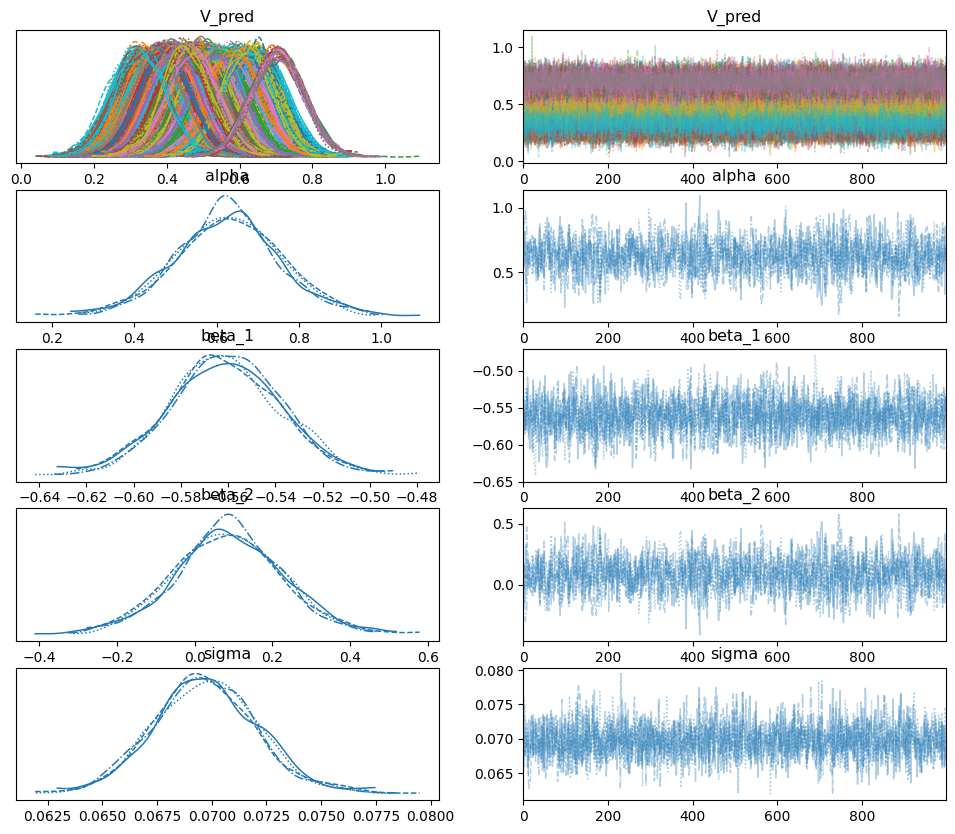

              mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
V_pred[0]    0.389  0.069   0.263    0.525      0.001    0.001    4216.0   
V_pred[1]    0.318  0.069   0.182    0.439      0.001    0.001    3979.0   
V_pred[2]    0.394  0.069   0.267    0.524      0.001    0.001    3594.0   
V_pred[3]    0.401  0.070   0.273    0.534      0.001    0.001    3828.0   
V_pred[4]    0.478  0.070   0.342    0.604      0.001    0.001    3902.0   
...            ...    ...     ...      ...        ...      ...       ...   
V_pred[407]  0.707  0.072   0.573    0.839      0.001    0.001    3889.0   
alpha        0.625  0.126   0.388    0.872      0.003    0.002    1409.0   
beta_1      -0.561  0.023  -0.606   -0.520      0.001    0.000    2024.0   
beta_2       0.087  0.138  -0.187    0.341      0.004    0.003    1432.0   
sigma        0.070  0.002   0.065    0.074      0.000    0.000    2240.0   

             ess_tail  r_hat  
V_pred[0]      3877.0    1.0  
V_pred[1]      3874.0    

In [25]:
import pandas as pd
from cmdstanpy import CmdStanModel

file_path = 'data/main_data.xlsx'
data = pd.read_excel(file_path)

# Separate complete and missing data
complete_data = data[data['Gun ownership %'] != -1]
missing_data = data[data['Gun ownership %'] == -1]

# Define the input data for the Stan model
input_model_1 = {
    'N': len(data),
    'N_complete': len(complete_data),
    'N_missing': len(missing_data),
    'V_complete': complete_data['Democratic %'].values,
    'V_missing': missing_data['Democratic %'].values,
    'G': complete_data['Gun ownership %'].values,
    'HDI': data['HDI'].values
}

# Define the path to the Stan model file
stan_file_path = 'model1_with_priors_modified.stan'

# Compile the Stan model
model_1 = CmdStanModel(stan_file=stan_file_path)

# Sample from the model
fit = model_1.sample(data=input_model_1, chains=4, seed=28052020, show_console=True)

# Extract the draws
df_fit = fit.draws_pd()

# Check diagnostics
print(fit.diagnose())


idata = az.from_cmdstanpy(fit)

# Plot trace plots for diagnostics
az.plot_trace(idata)
plt.show()

# Check R-hat values
summary = az.summary(idata)
print(summary)
